# Michele M. Crudele
# 2021858
# 5th Set of Exercises

# Exercise 1

We know that a person can have read the journal with probability $p=y/n=29/150$. Out of $n$ people, the number $y$ of people that have read the journal follow a Binomial distribution, since a person can have read it or not.

In this case the prior is a uniform distribution: as a consequence, the posterior will be proportional to the likelihood.

In [1]:
n <- 150
y <- 29
s <- 200
N <- 1/s
p <- seq(0, 1, length.out = s)
l <- c(0:150)

p.like <- dbinom(x = y, size = n, prob = p) 
#A uniform prior can be representeb by a beta prior with a = b = 1. 
#The Beta prior is the conjugate prior of the binomial likelihood with a = 1+y and b = 1+n-y
a <- 1+y
b <- 1+n-y
p.post <- dbeta(p, a, b)

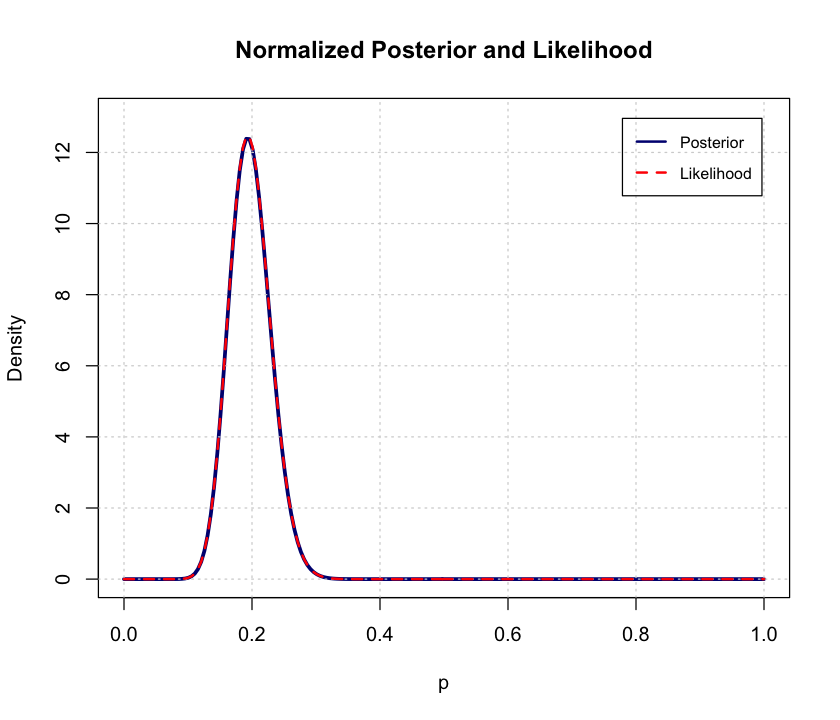

In [2]:
options(repr.plot.width=7, repr.plot.height=6)

plot(p, p.post, col = 'navy', type = 'l', lty = 1, lwd = 3, ylim = c(0, 13),
     xlab = 'p', ylab = 'Density', main = 'Normalized Posterior and Likelihood')

grid()
lines(p, p.like/(N*sum(p.like)), type = 'l', lty = 2, lwd = 2, col = 'red')

legend("topright", 
       legend = c("Posterior", "Likelihood"),
       inset = 0.04,
       col = c("navy", "red"), 
       lty = c(1,2),
       lwd = 2, 
       cex = 0.8, 
       box.lty=1,
       y.intersp=2)

# Exercise 2

I normalize the priors, since they are PDFs too

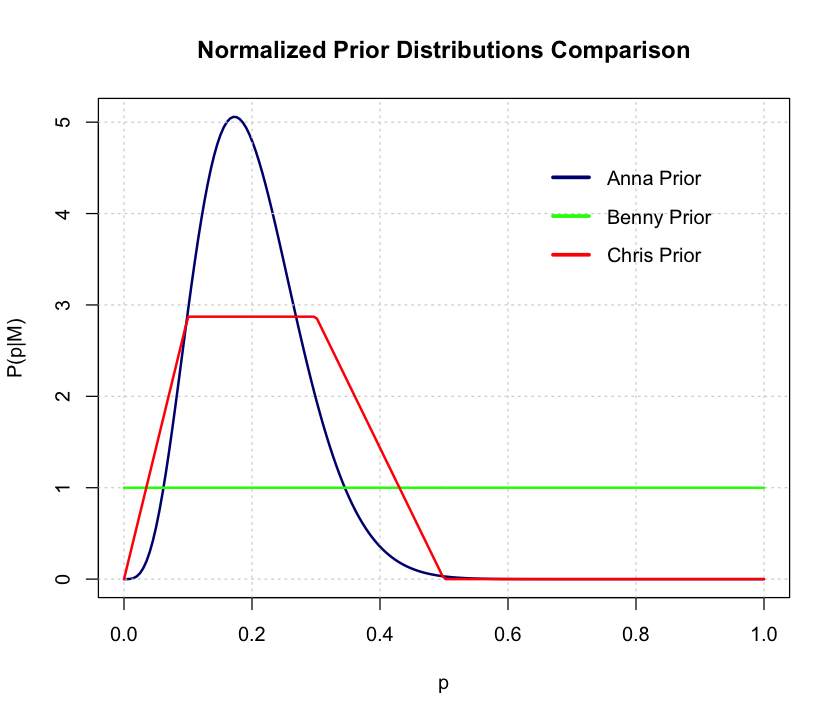

In [3]:
s <- 200
N <- 1/s
p <- seq(0,1,length.out=s)

mu <- 0.2
std <- 0.08

alpha <- (mu^2 - mu^3)/std^2 - mu
beta  <- alpha * (1/mu - 1)

anna.prior <- dbeta(p, alpha, beta)

benny.prior <- dunif(p, 0, 1)

chris.prior <- function(x) { chris <- ifelse(x<0, 0,
                                             ifelse(0<=x & x<0.1, 20*x,
                                                    ifelse(0.1<=x & x<0.3, 2,
                                                           ifelse(0.3<=x & x<0.5, 5-10*x, 0))))
    return (chris)
}

plot (p, anna.prior, type='l', col='navy', lwd=2, xlab='p', ylab='P(p|M)', main='Normalized Prior Distributions Comparison')
grid()
lines(p, benny.prior, col='green', lwd=2, xlab='x', ylab='P(x|M)')
lines(p, chris.prior(p)/(N*sum(chris.prior(p))), col='red', lwd=2, xlab='x', ylab='P(x|M)')
legend("topright", inset = 0.1, legend=c("Anna Prior", "Benny Prior", "Chris Prior"), 
       col=c('navy', 'green', 'red'), lwd=3,  box.lty=0, bty='n',y.intersp=2)

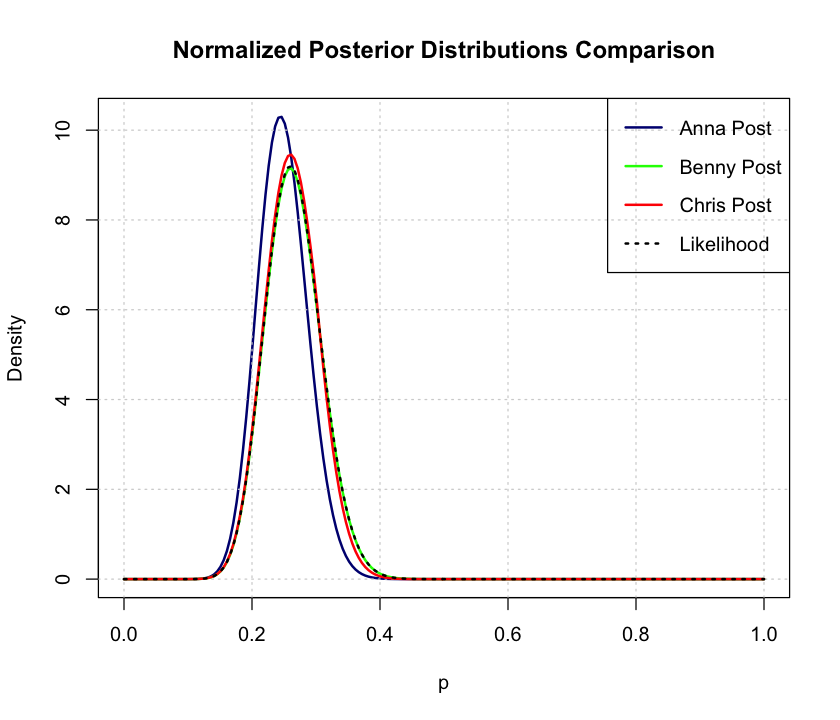

In [4]:
n <- 100
r <- 26
s <- 200
N <- 1/s
p <- seq(0, 1, length.out = s)

# I assume a binomial distribution for the likelihood

p.like <- function (x) {
    return(dbinom(x = r, size = n, prob = x))
}

anna.post <- function (x){
    return (dbeta(x,alpha+r, beta+n-r))
}

benny.post <- function (x){
    return (dbeta(x,1+r, 1+n-r)) #alpha=beta=1 for the uniform prior
}

chris.post <- function (x){
    return (p.like(x)*chris.prior(x))
}

plot (p, anna.post(p), type='l', col='navy', lwd=2, xlab='p', ylab='Density', 
      main='Normalized Posterior Distributions Comparison')
grid()
lines(p, benny.post(p), col='green', lwd=2)
lines(p, chris.post(p)/(N*sum(chris.post(p))), col='red', lwd=2)
lines(p, p.like(p)/(N*sum(p.like(p))), col='black', lty=3, lwd = 2)
legend("topright", legend=c("Anna Post", "Benny Post", "Chris Post", "Likelihood"), box.lty=1,
       col=c('navy', "green", 'red', 'black'),  lty=c(1, 1, 1, 3), lwd=2, y.intersp=2)

The best parameter is the one that maximizes the posterior distribution

In [5]:
anna.max = (r+alpha-1)/(n+alpha+beta-2)
benny.max = r/n #alpha=beta=1 for the uniform prior
chris.max = p[which.max(chris.post(p))]

print(paste("Most probable value from Anna's distriubtion: ", round(anna.max,2)))
print(paste("Most probable value from Benny's distriubtion:", round(benny.max,2)))
print(paste("Most probable value from Chris's distriubtion:", round(chris.max,2)))

[1] "Most probable value from Anna's distriubtion:  0.24"
[1] "Most probable value from Benny's distriubtion: 0.26"
[1] "Most probable value from Chris's distriubtion: 0.26"


In order to evaluate the credibility intervals, I create a function that computes the integral of the posterior from 0 to x, with x that goes from 0 to 1. The lower bound is fixed to the x where the integral is equal to (1-conf)/2 ( = 0.025 in this case), while the upper bound is set to the x where the integral is equal to 1-(1-conf)/2 ( = 0.975 in this case)

In [6]:
confidence <- function(post, conf) {
    a <- 1-conf
    x <- seq(0, 1, 0.0001)
    
    int <- function(x) {
        (integrate(post, 0, x)$value)/(integrate(post, 0, 1)$value) #normalization
    }

    s <- lapply(x, int)

    min <- min(x[which(s>a/2)])
    max <- min(x[which(s>1-a/2)-1])

return(list(min, max))
}

ann <- confidence(anna.post, 0.95)
anna.low <- ann[[1]]
anna.high <- ann[[2]]

benn <- confidence(benny.post, 0.95)
benny.low <- benn[[1]]
benny.high <- benn[[2]]

chri <- confidence(chris.post, 0.95)
chris.low <- chri[[1]]
chris.high <- chri[[2]]

In [7]:
cat("Anna's 95% credibility interval:  [",round(anna.low,3),",",round(anna.high,3),"]")
cat("\nBenny's 95% credibility interval: [",round(benny.low,3),",",round(benny.high,3),"]")
cat("\nChris's 95% credibility interval: [",round(chris.low,3),",",round(chris.high,3),"]")

Anna's 95% credibility interval:  [ 0.177 , 0.328 ]
Benny's 95% credibility interval: [ 0.184 , 0.354 ]
Chris's 95% credibility interval: [ 0.184 , 0.346 ]

In [8]:
x.a <- seq(anna.low, anna.high, length.out=length(p))
y.a <- c(anna.post(x.a))
y.a[1]=0
y.a[length(y.a)]=0


x.b <- seq(benny.low, benny.high, length.out=length(p))
y.b <- c(benny.post(x.b))
y.b[1]=0
y.b[length(y.b)]=0


x.c <- seq(chris.low, chris.high, length.out=length(p))
y.c <- c(chris.post(x.c)/(N*sum(chris.post(p))))
y.c[1]=0
y.c[length(y.b)]=0

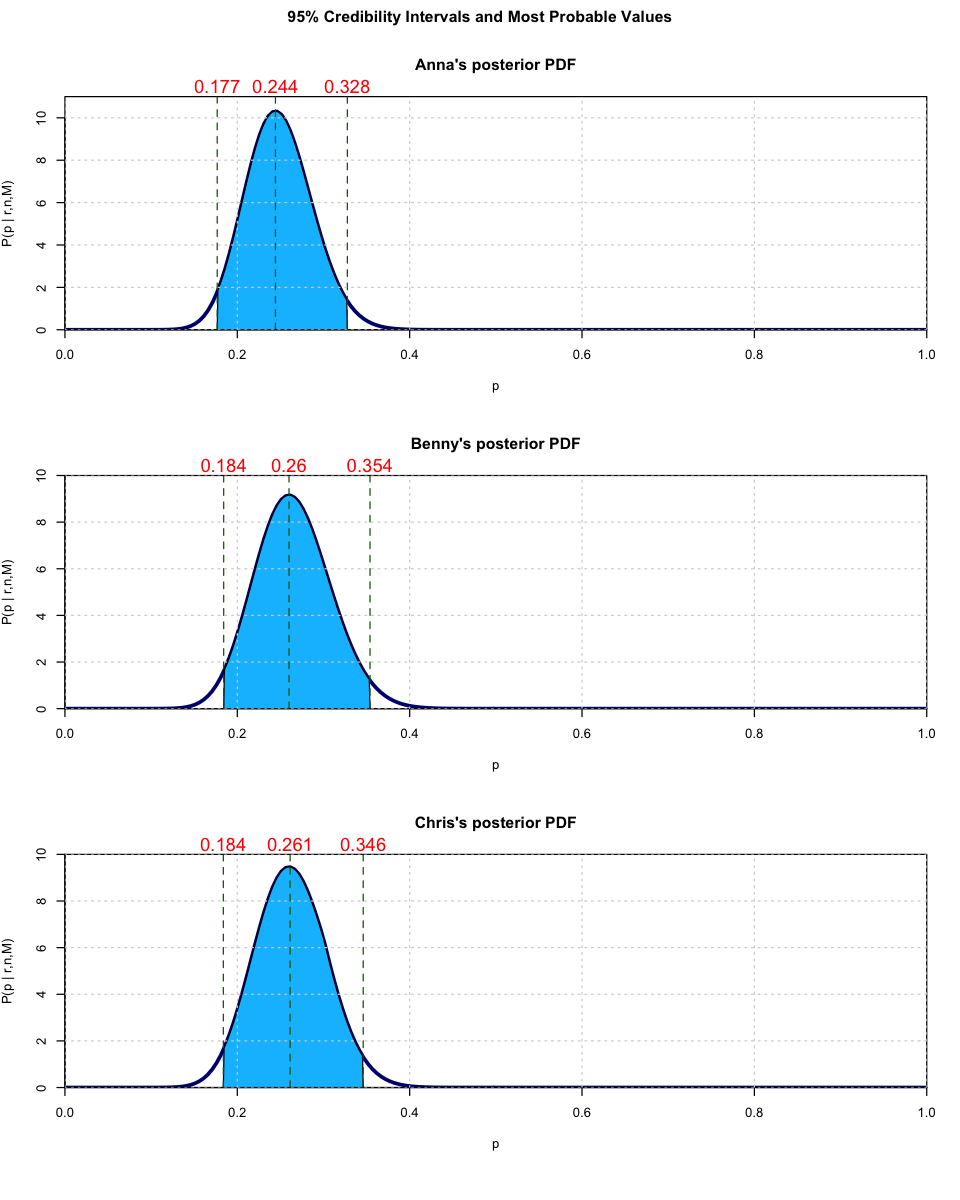

In [9]:
par(mfrow=c(3, 1), oma=c(2, 0, 2, 0))
options(repr.plot.width=8, repr.plot.height=10)

# annabenny
plot(p, anna.post(p), 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     xlab="p",
     ylim=c(0,11),
     ylab=expression(paste("P","(p | r,n,M)")),
     main='Anna\'s posterior PDF',
     pch=1)

polygon(x=x.a , y=y.a, col='deepskyblue', pch=1)

abline(v=anna.max,    col="darkgreen", lty=2, pch=1)
abline(v=anna.low, col="darkgreen", lty=2, pch=1)
abline(v=anna.high, col="darkgreen", lty=2, pch=1)

text(anna.max, par("usr")[4] + 1.1, labels = round(anna.max, 3), pos = 1, cex = 1.4, col="red", xpd=TRUE)
text(anna.low, par("usr")[4] + 1.1, labels = round(anna.low, 3), pos = 1, cex = 1.4, col="red", xpd=TRUE)
text(anna.high, par("usr")[4] + 1.1, labels = round(anna.high, 3), pos = 1, cex = 1.4, col="red", xpd=TRUE)
grid()

# benny
plot(p, benny.post(p), 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     xlab="p",
     ylim=c(0,10),
     ylab=expression(paste("P","(p | r,n,M)")),
     main='Benny\'s posterior PDF',
     pch=1)

polygon(x=x.b , y=y.b, col='deepskyblue', pch=1)

abline(v=benny.max,    col="darkgreen", lty=2, pch=1)
abline(v=benny.low, col="darkgreen", lty=2, pch=1)
abline(v=benny.high, col="darkgreen", lty=2, pch=1)

text(benny.max, par("usr")[4] + 1, labels = round(benny.max, 3), pos = 1, cex = 1.4, col="red", xpd=TRUE)
text(benny.low, par("usr")[4] + 1, labels = round(benny.low, 3), pos = 1, cex = 1.4, col="red", xpd=TRUE)
text(benny.high, par("usr")[4] + 1, labels = round(benny.high, 3), pos = 1, cex = 1.4, col="red", xpd=TRUE)
grid()


# chris
plot(p, chris.post(p)/(N*sum(chris.post(p))), 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     xlab="p",
     ylim=c(0,10),
     ylab=expression(paste("P","(p | r,n,M)")),
     main='Chris\'s posterior PDF',
     pch=1)

polygon(x=x.c , y=y.c, col='deepskyblue', pch=1)

abline(v=chris.max, col="darkgreen", lty=2, pch=1)
abline(v=chris.low, col="darkgreen", lty=2, pch=1)
abline(v=chris.high, col="darkgreen", lty=2, pch=1)

text(chris.max, par("usr")[4] + 1, labels = round(chris.max, 3), pos = 1, cex = 1.4, col="red", xpd=TRUE)
text(chris.low, par("usr")[4] + 1, labels = round(chris.low, 3), pos = 1, cex = 1.4, col="red", xpd=TRUE)
text(chris.high, par("usr")[4] + 1, labels = round(chris.high, 3), pos = 1, cex = 1.4, col="red", xpd=TRUE)
grid()
title("95% Credibility Intervals and Most Probable Values", outer=TRUE)

# Exercise 3

In [10]:
n = 30
r = 15
alpha = 5
beta = 5
N = 1/200
p <- seq(0,1,length.out = 200)

flat.prior <- function(x) {ifelse(x>=0 & x<=1, 1, 0)}
beta.prior <- function(x) {dbeta(x, alpha, beta)}

flat.post <- function(x) {dbeta(x, 1+r, 1+n-r)}
beta.post <- function(x) {dbeta(x, alpha+r, beta+n-r)}

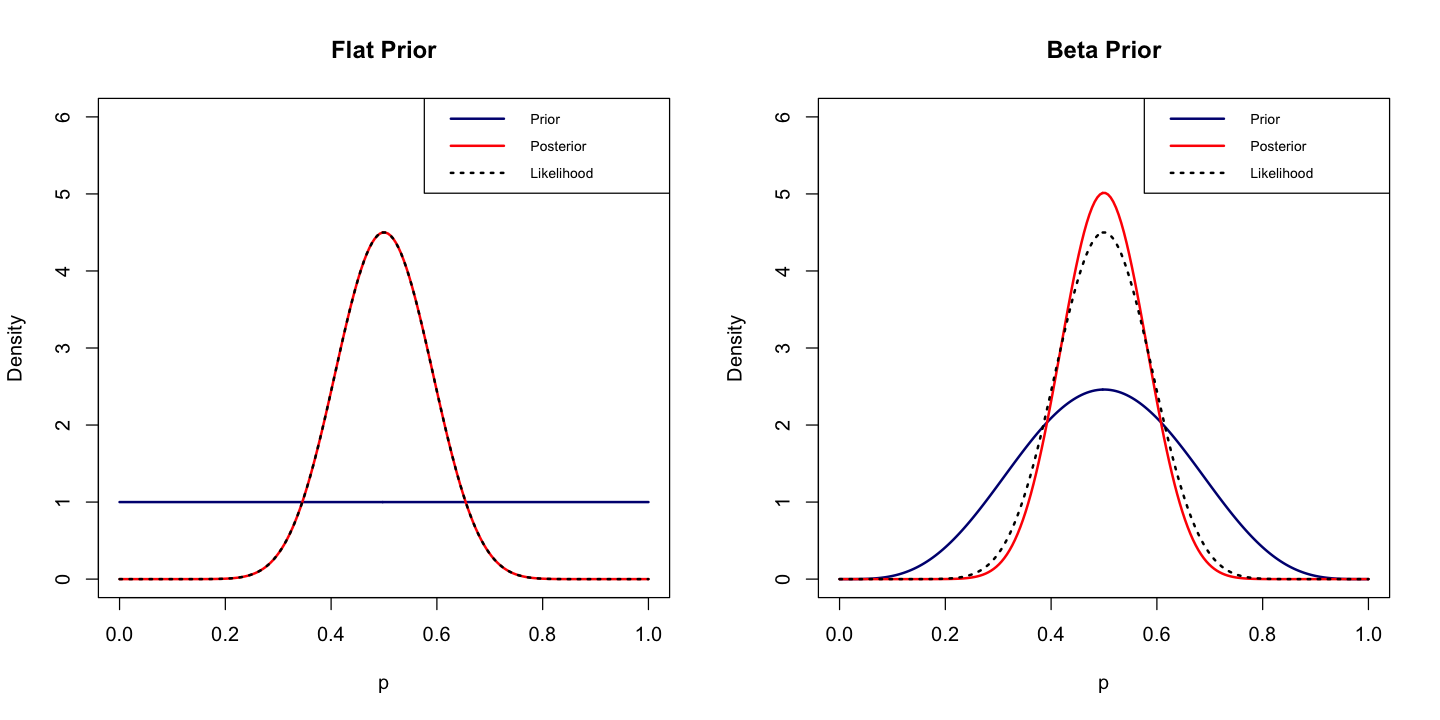

In [11]:
par(mfrow=c(1, 2))
options(repr.plot.width=12, repr.plot.height=6)

plot(p, flat.prior(p), ylim=c(0,6), type = 'l', col = 'navy', lwd=2, main='Flat Prior', ylab='Density')
lines(p, flat.post(p)/(N*sum(flat.post(p))), col = 'red', lwd=2)
lines(p, dbinom(x=r, size=n, prob=p)/(N*sum(dbinom(x=r, size=n, prob=p))), lty = 3, lwd=2)

legend("topright", legend=c("Prior", "Posterior", "Likelihood"), box.lty=1, cex = 0.7,
       col=c('navy', "red", 'black'),  lty=c(1, 1, 3), lwd=2, y.intersp=2)

plot(p, beta.prior(p), ylim=c(0,6), type = 'l', col = 'navy', lwd = 2, main='Beta Prior', ylab='Density')
lines(p, beta.post(p), col = 'red', lwd = 2)
lines(p, dbinom(x=r, size=n, prob=p)/(N*sum(dbinom(x=r, size=n, prob=p))), lty = 3, lwd = 2)

legend("topright", legend=c("Prior", "Posterior", "Likelihood"), box.lty=1, cex = 0.7,
       col=c('navy', "red", 'black'),  lty=c(1, 1, 3), lwd=2, y.intersp=2)

In [12]:
beta.maxim = (r+alpha-1)/(n+alpha+beta-2)
flat.maxim = r/n #alpha=beta=1 for the uniform prior

print(paste("Most probable value from beta distriubtion: ", round(beta.maxim,2)))
print(paste("Most probable value from flat distriubtion:", round(flat.maxim,2)))

[1] "Most probable value from beta distriubtion:  0.5"
[1] "Most probable value from flat distriubtion: 0.5"


In [13]:
bet <- confidence(beta.post, 0.95)

beta.lower <- bet[[1]]
beta.higher <- bet[[2]]

fla <- confidence(flat.post, 0.95)
flat.lower <- fla[[1]]
flat.higher <- fla[[2]]

In [14]:
cat("Beta prior 95% credibility interval: [",round(beta.lower,3),",",round(beta.higher,3),"]")
cat("\nFlat prior 95% credibility interval: [",round(flat.lower,3),",",round(flat.higher,3),"]")

Beta prior 95% credibility interval: [ 0.348 , 0.652 ]
Flat prior 95% credibility interval: [ 0.331 , 0.669 ]

In [15]:
x.a <- seq(beta.lower, beta.higher, length.out=length(p))
y.a <- c(beta.post(x.a))
y.a[1]=0
y.a[length(y.a)]=0


x.b <- seq(flat.lower, flat.higher, length.out=length(p))
y.b <- c(flat.post(x.b)/(N*sum(flat.post(p))))
y.b[1]=0
y.b[length(y.b)]=0

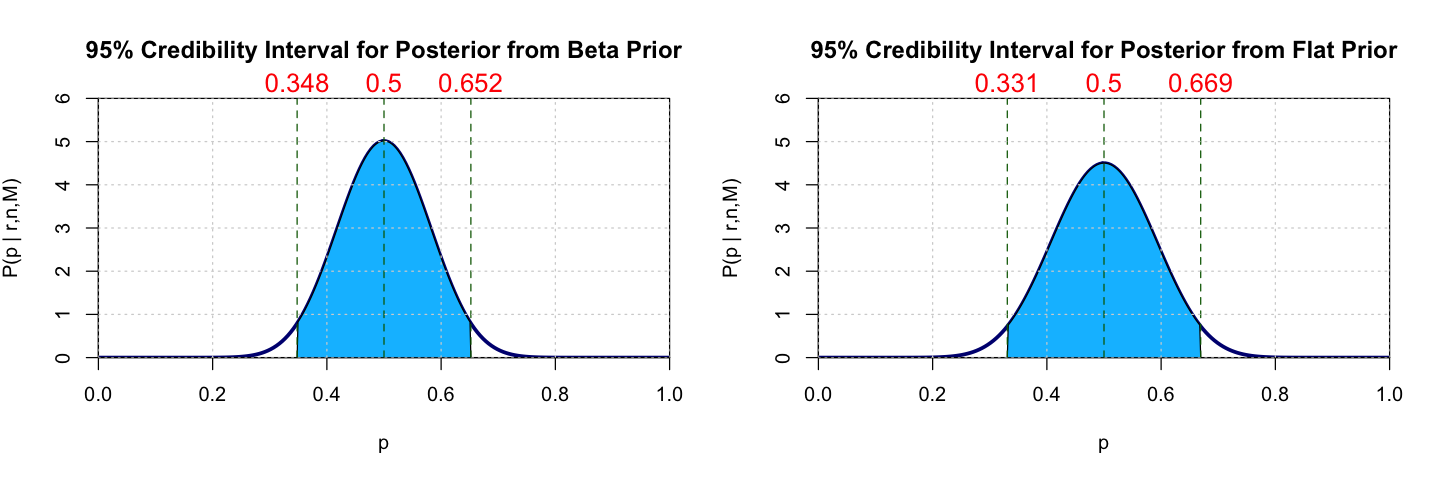

In [16]:
par(mfrow=c(1, 2))
options(repr.plot.width=12, repr.plot.height=4)

plot(p, beta.post(p), 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     xlab="p",
     ylim=c(0,6),
     ylab=expression(paste("P","(p | r,n,M)")),
     main='95% Credibility Interval for Posterior from Beta Prior',
     pch=1)

polygon(x=x.a , y=y.a, col='deepskyblue', pch=1)

abline(v=beta.maxim, col="darkgreen", lty=2, pch=1)
abline(v=beta.lower, col="darkgreen", lty=2, pch=1)
abline(v=beta.higher, col="darkgreen", lty=2, pch=1)

text(beta.maxim, par("usr")[4] + 0.8, labels = round(beta.maxim, 3), pos = 1, cex = 1.3, col="red", xpd=TRUE)
text(beta.lower, par("usr")[4] + 0.8, labels = round(beta.lower, 3),  pos = 1, cex = 1.3, col="red", xpd=TRUE)
text(beta.higher, par("usr")[4] + 0.8, labels = round(beta.higher, 3), pos = 1, cex = 1.3, col="red", xpd=TRUE)
grid()


plot(p, flat.post(p)/(N*sum(flat.post(p))), 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     xlab="p",
     ylim=c(0,6),
     ylab=expression(paste("P","(p | r,n,M)")),
     main='95% Credibility Interval for Posterior from Flat Prior',
     pch=1)

polygon(x=x.b , y=y.b, col='deepskyblue', pch=1)

abline(v=flat.maxim, col="darkgreen", lty=2, pch=1)
abline(v=flat.lower, col="darkgreen", lty=2, pch=1)
abline(v=flat.higher, col="darkgreen", lty=2, pch=1)

text(flat.maxim, par("usr")[4] + 0.8, labels = round(flat.maxim, 3), pos = 1, cex = 1.3, col="red", xpd=TRUE)
text(flat.lower, par("usr")[4] + 0.8, labels = round(flat.lower, 3), pos = 1, cex = 1.3, col="red", xpd=TRUE)
text(flat.higher, par("usr")[4] + 0.8, labels = round(flat.higher, 3), pos = 1, cex = 1.3, col="red", xpd=TRUE)
grid()

In [27]:
s <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", 
       "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")

t = 0
h = 0
N = 1/200
p <- seq(0,1,length.out = 200)
df.flat <- data.frame(matrix(ncol=6, nrow=0))
alpha = beta = 1
for (i in 1:(length(s))) {
    
    if(s[i]=="T") {
        t=t+1
    }
    else {h = h+1}
    

    flat.post <- function(x) {dbeta(x, alpha+t, beta+i-t)}

    flat.max = t/i #alpha=beta=1 for the uniform prior

    fla <- confidence(flat.post, 0.95)
    flat.low <- fla[[1]]
    flat.high <- fla[[2]]
    
    df.flat <- rbind(df.flat, c(i, h, t, flat.max, flat.low, flat.high))
}

In [28]:
colnames(df.flat) = c("#tosses", "heads", "tails", "max", "low", "high")
tail(df.flat)

,#tosses,heads,tails,max,low,high
25,25,11,14,0.5600000,0.3692,0.7341
26,26,12,14,0.5384615,0.3533,0.7133
27,27,12,15,0.5555556,0.3718,0.7248
28,28,13,15,0.5357143,0.3570,0.7055
29,29,14,15,0.5172414,0.3433,0.6870
30,30,15,15,0.5000000,0.3307,0.6693


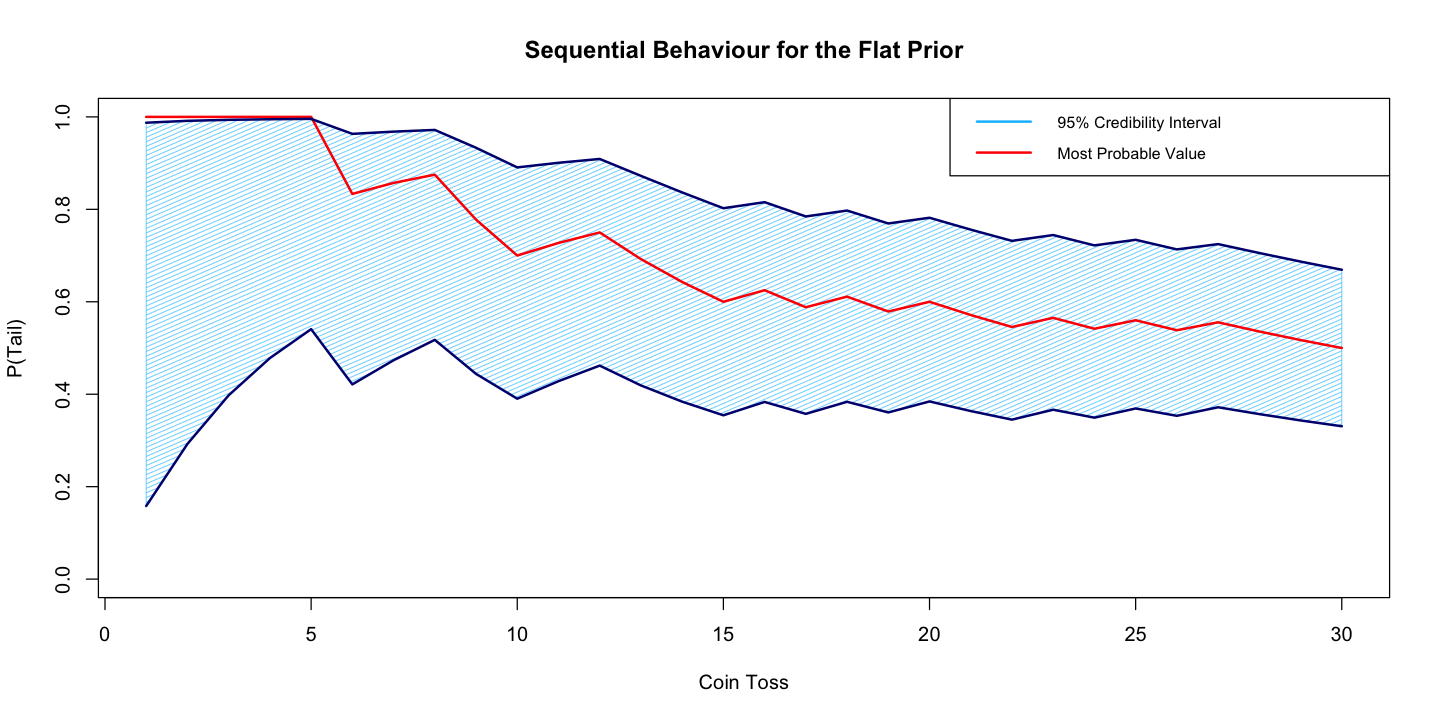

In [29]:
options(repr.plot.width=12, repr.plot.height=6)
plot(df.flat$"#tosses", df.flat$"max", type='l', ylim=c(0,1), main="Sequential Behaviour for the Flat Prior",
     xlab = 'Coin Toss', ylab='P(Tail)')
polygon(x=c(df.flat$"#tosses",rev(df.flat$"#tosses")), y=c(df.flat$low, rev(df.flat$high)), col='deepskyblue', density=30, lwd=0.5)
lines(df.flat$"#tosses", df.flat$"max", type='l', col = 'red', lwd = 2)
lines(df.flat$"#tosses", df.flat$low, col = 'navy', lwd=2)
lines(df.flat$"#tosses", df.flat$high, col = 'navy', lwd=2)
legend("topright", legend=c("95% Credibility Interval", "Most Probable Value"), box.lty=1, cex = 0.8,
       col=c('deepskyblue', 'red'),  lty=c(1, 1), lwd=2, y.intersp=2)

In [20]:
s <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H",
"H", "H")

t = 0
h = 0
alpha = 5
beta = 5
N = 1/200
p <- seq(0,1,length.out = 200)
df.beta <- data.frame(matrix(ncol=6, nrow=0))

for (i in 1:length(s)) {
    
    if(s[i]=="T") {
        t=t+1
    }
    else {h = h+1}
    
    conf <- 0.95
    a <- 1-conf
    
    beta.post <- function(x) {dbeta(x, alpha+t, beta+i-t)}
    
    beta.max <- (t+alpha-1)/(i+alpha+beta-2)
    
    bet <- confidence(beta.post, 0.95)
    beta.low <- bet[[1]]
    beta.high <- bet[[2]]
    
    df.beta <- rbind(df.beta, c(i, h, t, beta.max, beta.low, beta.high))
}

In [21]:
colnames(df.beta) = c("#tosses", "heads", "tails", "max", "low", "high")
tail(df.beta)

,#tosses,heads,tails,max,low,high
25,25,11,14,0.5454545,0.3789,0.7022
26,26,12,14,0.5294118,0.3665,0.6861
27,27,12,15,0.5428571,0.3810,0.6959
28,28,13,15,0.5277778,0.3693,0.6807
29,29,14,15,0.5135135,0.3582,0.6662
30,30,15,15,0.5000000,0.3479,0.6521


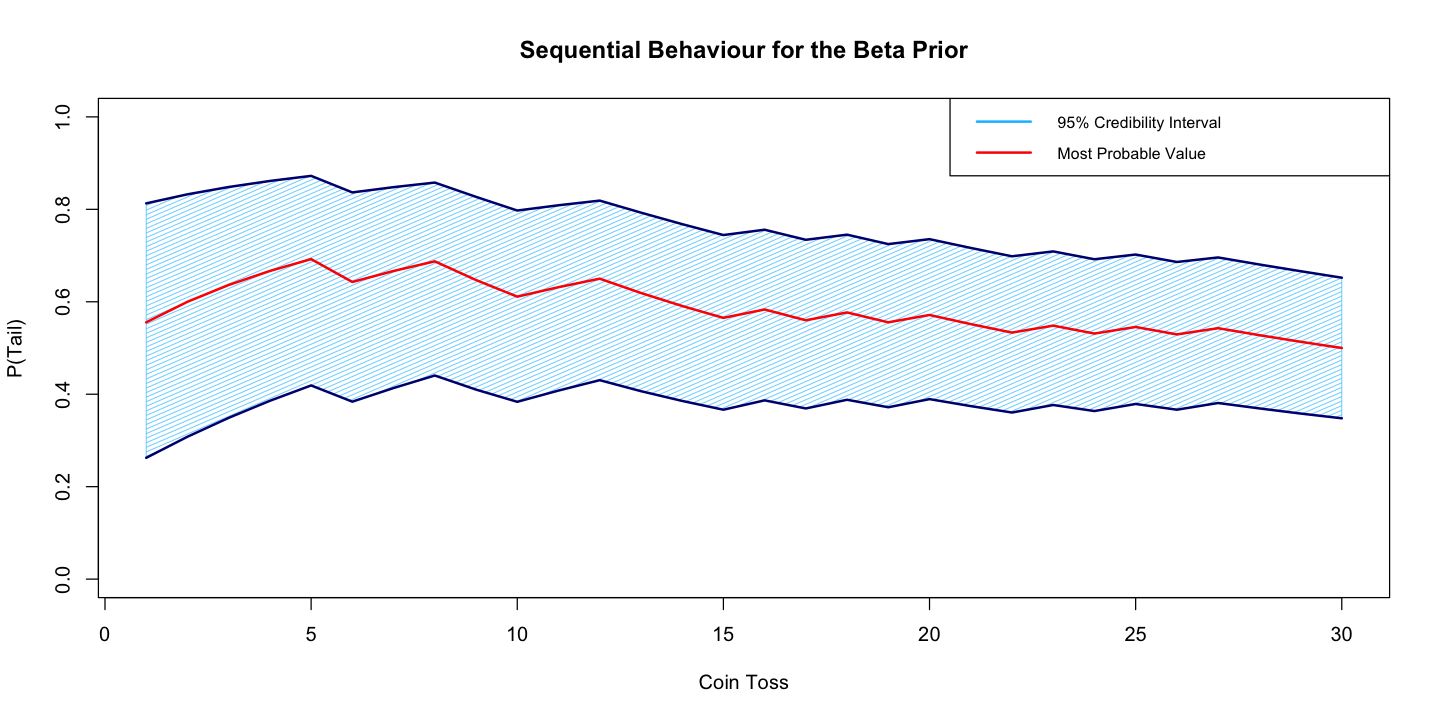

In [22]:
plot(df.beta$"#tosses", df.beta$"max", type='l', ylim=c(0,1), main="Sequential Behaviour for the Beta Prior",
     xlab = 'Coin Toss', ylab='P(Tail)')
polygon(x=c(df.beta$"#tosses",rev(df.beta$"#tosses")), y=c(df.beta$low, rev(df.beta$high)), col='deepskyblue', density=30, lwd=0.5)
lines(df.beta$"#tosses", df.beta$"max", type='l', col = 'red', lwd = 2)
lines(df.beta$"#tosses", df.beta$low, col = 'navy', lwd=2)
lines(df.beta$"#tosses", df.beta$high, col = 'navy', lwd=2)
legend("topright", legend=c("95% Credibility Interval", "Most Probable Value"), box.lty=1, cex = 0.8,
       col=c('deepskyblue', 'red'),  lty=c(1, 1), lwd=2, y.intersp=2)

In [23]:
cat("\nThe most probable value from the flat prior is", flat.maxim)
cat("\nFlat prior 95% credibility interval: [",round(flat.lower,3),",",round(flat.higher,3),"]")
cat("\nThe sequential analysis for the flat prior leads to:")
tail(df.flat, -26)

cat("The most probable value from the beta prior is", beta.maxim)
cat("\nBeta prior 95% credibility interval: [",round(beta.lower,3),",",round(beta.higher,3),"]")
cat("\nThe sequential analysis for the beta prior leads to:")
tail(df.beta, -26)


The most probable value from the flat prior is 0.5
Flat prior 95% credibility interval: [ 0.331 , 0.669 ]
The sequential analysis for the flat prior leads to:

,#tosses,heads,tails,max,low,high
27,27,12,15,0.5555556,0.3718,0.7248
28,28,13,15,0.5357143,0.3570,0.7055
29,29,14,15,0.5172414,0.3433,0.6870
30,30,15,15,0.5000000,0.3307,0.6693


The most probable value from the beta prior is 0.5
Beta prior 95% credibility interval: [ 0.348 , 0.652 ]
The sequential analysis for the beta prior leads to:

,#tosses,heads,tails,max,low,high
27,27,12,15,0.5428571,0.3810,0.6959
28,28,13,15,0.5277778,0.3693,0.6807
29,29,14,15,0.5135135,0.3582,0.6662
30,30,15,15,0.5000000,0.3479,0.6521


As it is possible to notice from the previous dataframes, the last values of the sequential analysis coincide with the values computed with the whole dataset.